In [1]:
# standard libraries
import pandas as pd
import numpy as np

import os
from os import listdir
from os.path import isfile, join

from IPython.display import Image
#from IPython.display import clear_output
#import sklearn
#import time
#import re

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
#from tabulate import tabulate

# data pre-processing
'''from sklearn.impute._base import _BaseImputer
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection._split import BaseShuffleSplit
from sklearn.preprocessing import MinMaxScaler, StandardScaler
'''
# prediction models
from sklearn.linear_model import LogisticRegression
#import tensorflow as tf
#from tensorflow.keras.callbacks import TensorBoard
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import fbeta_score

# import warnings filter
'''import warnings
warnings.filterwarnings('ignore')
from warnings import simplefilter 
simplefilter(action='ignore', category=FutureWarning)'''

"import warnings\nwarnings.filterwarnings('ignore')\nfrom warnings import simplefilter \nsimplefilter(action='ignore', category=FutureWarning)"

In [2]:
class FilePathManager:
    def __init__(self, local_dir: str):
        self.local_dir = local_dir
    
    def retrieve_full_path(self):
        return os.getcwd()+'/'+self.local_dir

In [3]:
class Loader:
    df = pd.DataFrame()
    
    def load_data(self, file_name):
        pass
    
    def get_df(self):
        pass
    
    def size(self):
        return len(self.df)

In [4]:
from typing import Callable
 
class CSVLoader(Loader):
    def __init__(self, file_path_manager: FilePathManager):
        self.file_path_manager = file_path_manager
        
    def load_data(self, _prepare_data: Callable[[pd.DataFrame], pd.DataFrame] = None):
        self.df = pd.read_csv(self.file_path_manager.retrieve_full_path())
        if _prepare_data:
            self.df = _prepare_data(self.df)
    
    def get_df(self):
        return self.df;
    
    def size(self):
        return len(self.df)  

In [5]:
def clean_data(df):
    df['y'] = df['y'].astype(int)
    #df['x32'] = df['x32'].str.replace('%','').astype(float)
    #df['x37'] = df['x37'].str.replace('$','').astype(float)
    return df

In [6]:
loader = CSVLoader(FilePathManager('final_project(5).csv'))
loader.load_data(clean_data)
df = loader.get_df()

## EDA

In [7]:
df.shape

(160000, 51)

In [8]:
df.head()

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x41,x42,x43,x44,x45,x46,x47,x48,x49,y
0,-0.166563,-3.961588,4.621113,2.481908,-1.800135,0.804684,6.718751,-14.789997,-1.040673,-4.204950,...,-1.497117,5.414063,-2.325655,1.674827,-0.264332,60.781427,-7.689696,0.151589,-8.040166,0
1,-0.149894,-0.585676,27.839856,4.152333,6.426802,-2.426943,40.477058,-6.725709,0.896421,0.330165,...,36.292790,4.490915,0.762561,6.526662,1.007927,15.805696,-4.896678,-0.320283,16.719974,0
2,-0.321707,-1.429819,12.251561,6.586874,-5.304647,-11.311090,17.812850,11.060572,5.325880,-2.632984,...,-0.368491,9.088864,-0.689886,-2.731118,0.754200,30.856417,-7.428573,-2.090804,-7.869421,0
3,-0.245594,5.076677,-24.149632,3.637307,6.505811,2.290224,-35.111751,-18.913592,-0.337041,-5.568076,...,15.691546,-7.467775,2.940789,-6.424112,0.419776,-72.424569,5.361375,1.806070,-7.670847,0
4,-0.273366,0.306326,-11.352593,1.676758,2.928441,-0.616824,-16.505817,27.532281,1.199715,-4.309105,...,-13.911297,-5.229937,1.783928,3.957801,-0.096988,-14.085435,-0.208351,-0.894942,15.724742,1


In [9]:
def target_EDA(target):
    y_barchart = sns.countplot(x = target)
    y_counts = target.value_counts()
    y_pcts = target.value_counts(normalize=True)   
    
    return plt.show(), print("Counts:\n", y_counts), print("\nPercents:\n", y_pcts) 

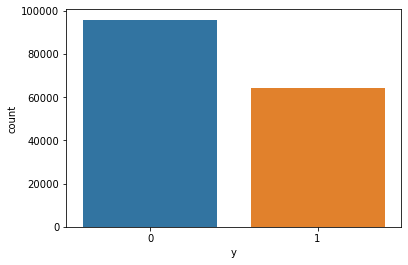

Counts:
 0    95803
1    64197
Name: y, dtype: int64

Percents:
 0    0.598769
1    0.401231
Name: y, dtype: float64


(None, None, None)

In [10]:
target_EDA(df['y'])

### Missing Values & Data Types
- Minimal missing values, <= 0.03% of feature data.  No missing values for target response.
- Five features were read in as object (string) data types, the rest are float64 (continuous)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160000 entries, 0 to 159999
Data columns (total 51 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   x0      159974 non-null  float64
 1   x1      159975 non-null  float64
 2   x2      159962 non-null  float64
 3   x3      159963 non-null  float64
 4   x4      159974 non-null  float64
 5   x5      159963 non-null  float64
 6   x6      159974 non-null  float64
 7   x7      159973 non-null  float64
 8   x8      159979 non-null  float64
 9   x9      159970 non-null  float64
 10  x10     159957 non-null  float64
 11  x11     159970 non-null  float64
 12  x12     159964 non-null  float64
 13  x13     159969 non-null  float64
 14  x14     159966 non-null  float64
 15  x15     159965 non-null  float64
 16  x16     159974 non-null  float64
 17  x17     159973 non-null  float64
 18  x18     159960 non-null  float64
 19  x19     159965 non-null  float64
 20  x20     159962 non-null  float64
 21  x21     15

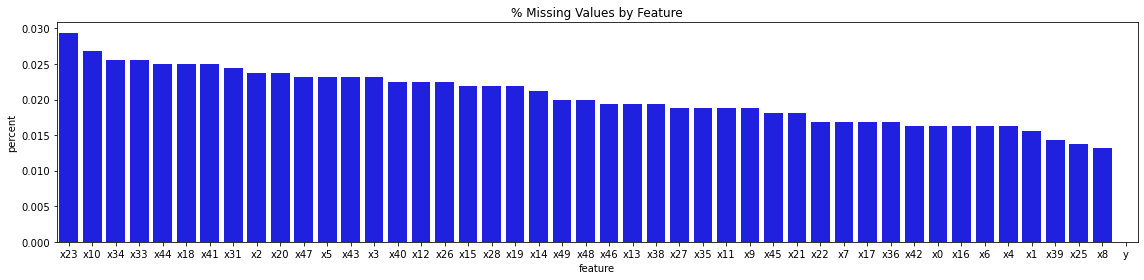

In [12]:
pct_missing = ( df.shape[0] - df.describe().T['count'] )/df.shape[0]*100
pct_missing = pct_missing.sort_values(ascending=False).reset_index()
pct_missing.columns = ['feature', 'count']

plt.figure(figsize=(16, 4))
sns.barplot(data=pct_missing, x='feature', y='count', color='blue')
plt.ylabel('percent')
plt.title("% Missing Values by Feature")
plt.tight_layout() 
plt.show()

#### Continuous features need to be centered and scaled

In [13]:
df.describe()

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x41,x42,x43,x44,x45,x46,x47,x48,x49,y
count,159974.000000,159975.000000,159962.000000,159963.000000,159974.000000,159963.000000,159974.000000,159973.000000,159979.000000,159970.000000,...,159960.000000,159974.000000,159963.000000,159960.000000,159971.000000,159969.000000,159963.000000,159968.000000,159968.000000,160000.000000
mean,-0.001028,0.001358,-1.150145,-0.024637,-0.000549,0.013582,-1.670670,-7.692795,-0.030540,0.005462,...,6.701076,-1.833820,-0.002091,-0.006250,0.000885,-12.755395,0.028622,-0.000224,-0.674224,0.401231
std,0.371137,6.340632,13.273480,8.065032,6.382293,7.670076,19.298665,30.542264,8.901185,6.355040,...,18.680196,5.110705,1.534952,4.164595,0.396621,36.608641,4.788157,1.935501,15.036738,0.490149
min,-1.592635,-26.278302,-59.394048,-35.476594,-28.467536,-33.822988,-86.354483,-181.506976,-37.691045,-27.980659,...,-82.167224,-27.933750,-6.876234,-17.983487,-1.753221,-201.826828,-21.086333,-8.490155,-65.791191,0.000000
25%,-0.251641,-4.260973,-10.166536,-5.454438,-4.313118,-5.148130,-14.780146,-27.324771,-6.031058,-4.260619,...,-5.804080,-5.162869,-1.039677,-2.812055,-0.266518,-36.428329,-3.216016,-1.320800,-10.931753,0.000000
50%,-0.002047,0.004813,-1.340932,-0.031408,0.000857,0.014118,-1.948594,-6.956789,-0.016840,0.006045,...,6.840110,-1.923754,-0.004385,-0.010484,0.001645,-12.982497,0.035865,-0.011993,-0.574410,0.000000
75%,0.248532,4.284220,7.871676,5.445179,4.306660,5.190749,11.446931,12.217071,5.972349,4.305734,...,19.266367,1.453507,1.033275,2.783274,0.269049,11.445443,3.268028,1.317703,9.651072,1.000000
max,1.600849,27.988178,63.545653,38.906025,26.247812,35.550110,92.390605,149.150634,39.049831,27.377842,...,100.050432,22.668041,6.680922,19.069759,1.669205,150.859415,20.836854,8.226552,66.877604,1.000000


#### Only three features are truly object (string) data types: x24, x29, x30.  

In [14]:
cont_vars = df.describe().columns
cat_vars = set(df.columns) - set(cont_vars)
df[cat_vars].describe()

,x29,x37,x24,x32,x30
count,159970,159977,159972,159969,159970
unique,12,129198,3,12,5
top,July,$-311.26,asia,0.01%,wednesday
freq,45569,6,138965,40767,101535


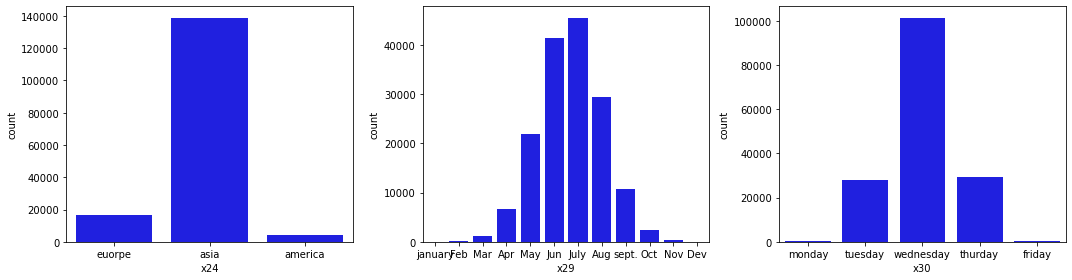

In [15]:
fig, axis = plt.subplots(1, 3, figsize=(15, 4))
sns.countplot(ax=axis[0], x = df['x24'], color='blue')
sns.countplot(ax=axis[1], x = df['x29'], color='blue',
              order=['january', 'Feb', 'Mar','Apr','May','Jun','July','Aug','sept.', 'Oct','Nov','Dev'])
sns.countplot(ax=axis[2], x = df['x30'], order=['monday','tuesday','wednesday','thurday','friday'], color='blue')
fig.tight_layout() 

#### No big shifts in target response between categorical features
Likely not strong predictors

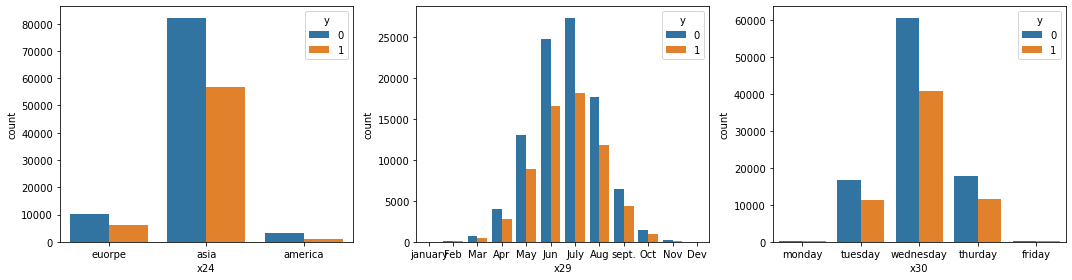

In [16]:
fig, axis = plt.subplots(1, 3, figsize=(15, 4))
sns.countplot(ax=axis[0], data = df, x = 'x24', hue='y')
sns.countplot(ax=axis[1], data = df, x = 'x29', hue='y',
              order=['january', 'Feb', 'Mar','Apr','May','Jun','July','Aug','sept.', 'Oct','Nov','Dev'])
sns.countplot(ax=axis[2], data = df, x = 'x30', hue='y', order=['monday','tuesday','wednesday','thurday','friday'])
fig.tight_layout()

#### Features x32 and x37 need to be recoded as float

In [17]:
df['x32'] = df['x32'].str.replace('%','').astype(float)
df['x37'] = df['x37'].str.replace('$','').astype(float)

C:\Users\allep\anaconda3\envs\MyEnv3_7\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  


In [18]:
df.loc[:,['x32','x37']].describe()

,x32,x37
count,159969.000000,159977.000000
mean,-0.000011,0.377628
std,0.010400,999.945334
min,-0.050000,-4734.540000
25%,-0.010000,-691.370000
50%,0.000000,-13.760000
75%,0.010000,664.210000
max,0.050000,5546.990000


In [19]:
cont_vars = list(cont_vars)
cont_vars.pop() # remove 'y'
cont_vars.append('x32')
cont_vars.append('x37')
np.array(cont_vars)

array(['x0', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10',
       'x11', 'x12', 'x13', 'x14', 'x15', 'x16', 'x17', 'x18', 'x19',
       'x20', 'x21', 'x22', 'x23', 'x25', 'x26', 'x27', 'x28', 'x31',
       'x33', 'x34', 'x35', 'x36', 'x38', 'x39', 'x40', 'x41', 'x42',
       'x43', 'x44', 'x45', 'x46', 'x47', 'x48', 'x49', 'x32', 'x37'],
      dtype='<U3')

In [20]:
len(cont_vars)

47

### Skewness & Outliers
Features are not skewed and no major outliers are present.  Scale the data and proceed.

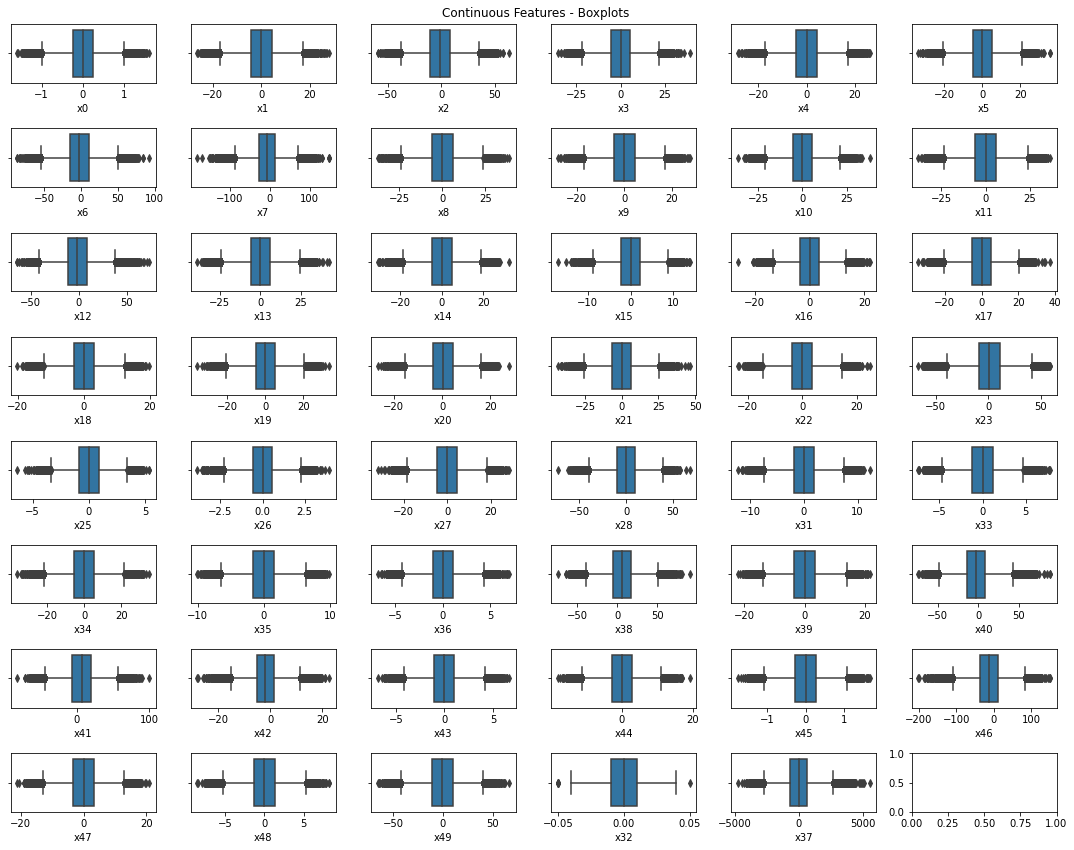

In [21]:
rows = 8
cols = 6
fig, axes = plt.subplots(rows, cols, figsize=(15, 12))
fig.suptitle('Continuous Features - Boxplots')
for i,j in zip(cont_vars, range(47)):
    sns.boxplot(ax = axes[int(j/cols), j%cols], x = df[i])

fig.tight_layout()

### Mean differences in features vs. target response
Several features show promise for classifying the target response: x2, x6, x7, x12, x20, x23, x37, x38, x40, x41, x42, x46, x49

In [ ]:
rows = 8
cols = 6
fig, axes = plt.subplots(rows, cols, figsize=(14, 14))
fig.suptitle('Continuous Features - Mean 95% CIs vs. Target')
for i,j in zip(cont_vars, range(47)):
    sns.pointplot(ax = axes[int(j/cols), j%cols], data = df, y = i, x='y')

fig.tight_layout()

In [ ]:
df.corr()

In [ ]:
df.hist(figsize=(15,15)) 
#set a large figsize if you have > 9 variables
plt.tight_layout()
plt.show()

In [ ]:
print(df['x24'].value_counts())

In [23]:
#fix Europe
df["x24"]= df["x24"].astype(str)
df["x24"]= df["x24"].str.replace('euorpe','europe')

In [ ]:
print(df['x24'].value_counts())

In [ ]:
print(df['x29'].value_counts())

In [24]:
#Fix months for consistency
df["x29"]= df["x29"].astype(str)
df["x29"]= df["x29"].str.replace('sept.','Sep')
df["x29"]= df["x29"].str.replace('January','Jan')
df["x29"]= df["x29"].str.replace('Dev','Dec')
df["x29"]= df["x29"].str.replace('July','Jul')

C:\Users\allep\anaconda3\envs\MyEnv3_7\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
print(df['x29'].value_counts())

In [ ]:
print(df['x30'].value_counts())

In [25]:
#fix days of week
df["x30"]= df["x30"].astype(str)
df["x30"]= df["x30"].str.replace('thurday','thursday')

In [ ]:
print(df['x30'].value_counts())

In [26]:
print(df['x32'].value_counts())

 0.00    64415
 0.01    40767
-0.01    34094
-0.02     9924
 0.02     7987
-0.03     1727
 0.03      855
-0.04      138
 0.04       55
-0.05        6
 0.05        1
Name: x32, dtype: int64


In [27]:
print(df['x37'].value_counts())

-311.26     6
-336.77     6
 237.40     6
 72.42      6
 341.26     6
           ..
-505.21     1
 770.07     1
 74.62      1
-1082.96    1
-1229.34    1
Name: x37, Length: 129198, dtype: int64


x24,x29 and x30 object type columns appear to be continents, months, and days of the weekrespectively. x32 andx37 have special characters in the data; a "%" in x32 and a "$" in x37. for x32 and x37 special characters can be removed and columns can be changed to numeric.

# Missing Values

In [ ]:
import missingno as msno
msno.matrix(df)

In [ ]:
#plot missing values
df.isna().sum().reset_index(name="n").plot.bar(x='index', y='n', rot=90, figsize = (15,8)).set_title('Missing Value Counts')

Numerical missing variable will be replaced with mean aand categorical will be replaced with mode(the most common value)

In [ ]:
#categorical missing values
print("Missing Values in Continent: ",df.x24.value_counts().nan)
print("Missing Values in Month: ",df.x29.value_counts().nan)
print("Missing Values in Day: ",df.x30.value_counts().nan)

## TODO: Move imputation down after training/test split.  Use SimpleImputer().

In [28]:
#replace Categorical Missing values with the mode (the most common are listed above in the value counts)
df['x24'] = df['x24'].str.replace('nan','asia')
df['x29'] = df['x29'].str.replace('nan','Jul')
df['x30'] = df['x30'].str.replace('nan','wednesday')

In [29]:
#replace numeric Missing Values with the mean
for col in df.columns.difference(['x24','x29','x30', 'y']): 
    df[col].fillna(value=df[col].mean(), inplace=True)


In [30]:
#check for missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160000 entries, 0 to 159999
Data columns (total 51 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   x0      160000 non-null  float64
 1   x1      160000 non-null  float64
 2   x2      160000 non-null  float64
 3   x3      160000 non-null  float64
 4   x4      160000 non-null  float64
 5   x5      160000 non-null  float64
 6   x6      160000 non-null  float64
 7   x7      160000 non-null  float64
 8   x8      160000 non-null  float64
 9   x9      160000 non-null  float64
 10  x10     160000 non-null  float64
 11  x11     160000 non-null  float64
 12  x12     160000 non-null  float64
 13  x13     160000 non-null  float64
 14  x14     160000 non-null  float64
 15  x15     160000 non-null  float64
 16  x16     160000 non-null  float64
 17  x17     160000 non-null  float64
 18  x18     160000 non-null  float64
 19  x19     160000 non-null  float64
 20  x20     160000 non-null  float64
 21  x21     16

# Numeric Variable Exploration

In [ ]:
#Boxplots
df.boxplot(vert = True, grid = False, figsize = (20,5))

Boxplots make it obvious that x37 is on a much larger scale than the other variables.

In [ ]:
#Boxplots - x37 only
df.boxplot(vert = True, grid = False, figsize = (5,5), column = ['x37'])

In [ ]:
#boxplots excluding x37
df_ex_x37 = df.drop('x37', axis = 1)
df_ex_x37.boxplot(vert = True, grid = False, figsize = (20,5))

In [ ]:
df_cat = df[['x24','x29','x30']]
df_cat['x24'].value_counts().plot(kind='bar')

In [ ]:
df_cat['x29'].value_counts().plot(kind='bar')

In [ ]:
df_cat['x30'].value_counts().plot(kind='bar')

## TO DO: Move below train/test split and use OneHotEncoding() 
##### One_Hot encoded
The categorical variables will need to be one-hot encoded to create binary features for use in classification models. Luckily, the three categorical variables only contain a handful of unique values, so this should not create a massive amount of sparsity in the dataset.

In [31]:
# Create new one-hot encoded features using pandas.get_dummies
# from https://datagy.io/pandas-get-dummies/
categorical_columns = ['x24', 'x29', 'x30']

for column in categorical_columns:
    tempdf = pd.get_dummies(df[column], prefix=column)
    df = pd.merge(
        left=df,
        right=tempdf,
        left_index=True,
        right_index=True,
    )
    df = df.drop(columns=column)
df.head()

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x29_Mar,x29_May,x29_Nov,x29_Oct,x29_Sep,x30_friday,x30_monday,x30_thursday,x30_tuesday,x30_wednesday
0,-0.166563,-3.961588,4.621113,2.481908,-1.800135,0.804684,6.718751,-14.789997,-1.040673,-4.204950,...,0,0,0,0,0,0,0,0,1,0
1,-0.149894,-0.585676,27.839856,4.152333,6.426802,-2.426943,40.477058,-6.725709,0.896421,0.330165,...,0,0,0,0,0,0,0,0,0,1
2,-0.321707,-1.429819,12.251561,6.586874,-5.304647,-11.311090,17.812850,11.060572,5.325880,-2.632984,...,0,0,0,0,0,0,0,0,0,1
3,-0.245594,5.076677,-24.149632,3.637307,6.505811,2.290224,-35.111751,-18.913592,-0.337041,-5.568076,...,0,0,0,0,0,0,0,0,0,1
4,-0.273366,0.306326,-11.352593,1.676758,2.928441,-0.616824,-16.505817,27.532281,1.199715,-4.309105,...,0,0,0,0,0,0,0,0,1,0


In [ ]:
#New dataframe
df.info()

# Training and Test Data Split

In [32]:
## split dataset into independent (X) and target (y) variables
y = df['y']
X = df.drop(['y'], axis=1)
print('Size of target vector: ', y.shape)
print('-'*50)
print('Size of explanatory matrix: ',X.shape)

Size of target vector:  (160000,)
--------------------------------------------------
Size of explanatory matrix:  (160000, 67)


In [33]:
## Check target counts
print("split between classes:  \n", '-----------------')
print(y.value_counts(normalize=True))

split between classes:  
 -----------------
0    0.598769
1    0.401231
Name: y, dtype: float64


In [34]:
## Creating training and test data - 10% witholding for test set (stratified)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3)

## Test and train set counts - check that stratification was applied
print('Size of explanatory matrix for Training set: ',X_train.shape)
print('Size of explanatory matrix for Test set: ',X_test.shape)

print("Training set split between classes:  \n", '-----------------')
print(y_train.value_counts(normalize=True))

print("Test set split between classes:  \n", '-----------------')
print(y_test.value_counts(normalize=True))

Size of explanatory matrix for Training set:  (112000, 67)
Size of explanatory matrix for Test set:  (48000, 67)
Training set split between classes:  
 -----------------
0    0.598768
1    0.401232
Name: y, dtype: float64
Test set split between classes:  
 -----------------
0    0.598771
1    0.401229
Name: y, dtype: float64


In [35]:
# Normalize all of the explanatory features with StandardScaler in train and test sets
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_sc = pd.DataFrame( sc.transform(X_train), columns = X_train.columns, index = X_train.index)
X_test_sc = pd.DataFrame( sc.transform(X_test), columns = X_test.columns, index = X_test.index)

# Logistic Regression

In [36]:
from sklearn.linear_model import LogisticRegression
#from sklearn import metrics as mt
from sklearn.metrics import accuracy_score as acc

In [37]:
lr_model = LogisticRegression(penalty='l1', solver='liblinear', random_state = 1) 
lr_results = pd.DataFrame()

for i in [0.001, 0.01, 1, 10]:
    lr_model.C = i
    lr_model.fit(X_train_sc,y_train)
    lr_results = lr_results.append({"C": i,
                                    "Train Accuracy": acc(y_train, lr_model.predict(X_train_sc)),
                                    "Test Accuracy":  acc(y_test, lr_model.predict(X_test_sc))},
                                    ignore_index=True)
    print("C=",i,"complete")

lr_results

C= 0.001 complete
C= 0.01 complete
C= 1 complete
C= 10 complete


,C,Train Accuracy,Test Accuracy
0,0.001,0.701795,0.699042
1,0.010,0.703688,0.701313
2,1.000,0.703946,0.701313
3,10.000,0.703946,0.701271


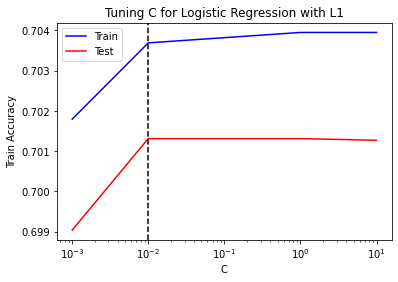

In [38]:
sns.lineplot(data=lr_results, x='C', y='Train Accuracy', color='blue')
sns.lineplot(data=lr_results, x='C', y='Test Accuracy', color='red')
plt.title('Tuning C for Logistic Regression with L1')
plt.legend(['Train', 'Test'])
plt.xscale('log')
plt.axvline(0.01, color='black', ls='--')
plt.show()

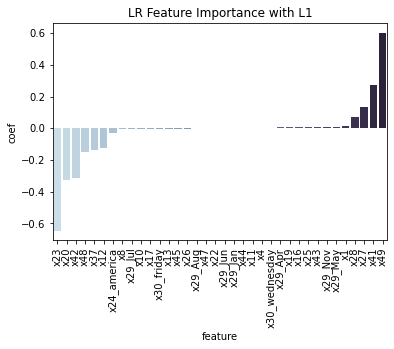

In [39]:
lr_tuned = LogisticRegression(penalty='l1', C=0.01, solver='liblinear', random_state = 1) 
lr_tuned.fit(X_train_sc,y_train)

feat_coef = []
feat = zip(X_train_sc.columns, lr_tuned.coef_[0])
[feat_coef.append([i,j]) for i,j in feat]
feat_coef = pd.DataFrame(feat_coef, columns = ['feature','coef'])
top_feat_lr = feat_coef.loc[abs(feat_coef['coef'])>0].sort_values(by='coef')

feat_plot = sns.barplot(data=top_feat_lr, x='feature', y='coef', palette = "ch:s=.25,rot=-.25")
plt.xticks(rotation=90)
plt.title('LR Feature Importance with L1')
plt.show()

## Cost Matrix
What is the expected monetary cost (or loss) associated with your model and how might you best translate this to your customer?  
Remember, predicting class 1 incorrectly costs the customer 100 dollas while incorrectly predicting class 0 costs the customer 25 dollars; or said another way, False Positives = 100 and False Negatives = 25

In [55]:
def cost_calc(conf_matrix):
    cost_matrix = np.array([[0,-100],[-25,0]])
    cost = np.sum(cost_matrix*conf_matrix)/np.sum(conf_matrix)
    return cost

In [59]:
yhat_train = lr_tuned.predict(X_train_sc)
conf_train = confusion_matrix(y_train, yhat_train)
print("Train: Confusion Matrix\n", conf_train)
cost_train = cost_calc(conf_train)
print("\nTrain: Cost per Prediction =", cost_train)

Train: Confusion Matrix
 [[55507 11555]
 [21632 23306]]

Train: Cost per Prediction = -15.145535714285714


In [60]:
yhat_test = lr_tuned.predict(X_test_sc)
conf_test = confusion_matrix(y_test, yhat_test)
print("Train: Confusion Matrix\n", conf_test)
cost_test = cost_calc(conf_test)
print("\nTrain: Cost per Prediction =", cost_test)

Train: Confusion Matrix
 [[23699  5042]
 [ 9295  9964]]

Train: Cost per Prediction = -15.3453125


### Tune threshold to reduce cost (minimize losses)

In [86]:
train_proba = lr_tuned.predict_proba(X_train_sc)
test_proba = lr_tuned.predict_proba(X_test_sc)
cost_results = pd.DataFrame()
thresh = 0

for i in range(11):
    yhat_train = pd.Series(train_proba[:,0] < thresh).astype(int)
    yhat_test = pd.Series(test_proba[:,0] < thresh).astype(int)
    conf_train = confusion_matrix(y_train, yhat_train)
    conf_test = confusion_matrix(y_test, yhat_test)
    cost_results = cost_results.append({"Threshold": thresh,
                                    "Train Cost": -cost_calc(conf_train),
                                    "Test Cost":  -cost_calc(conf_test)},
                                    ignore_index=True)
    thresh = thresh + 0.05
    
cost_results

,Threshold,Train Cost,Test Cost
0,0.00,10.030804,10.030729
1,0.05,9.953125,9.957812
2,0.10,9.808482,9.822917
3,0.15,9.767188,9.747917
4,0.20,9.854241,9.837500
5,0.25,10.217857,10.259375
6,0.30,10.730804,10.809896
7,0.35,11.503571,11.625000
8,0.40,12.379464,12.608333
9,0.45,13.617857,13.761458


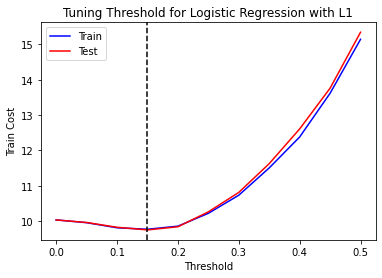

In [87]:
sns.lineplot(data=cost_results, x='Threshold', y='Train Cost', color='blue')
sns.lineplot(data=cost_results, x='Threshold', y='Test Cost', color='red')
plt.title('Tuning Threshold for Logistic Regression with L1')
plt.legend(['Train', 'Test'])
#plt.xscale('log')
plt.axvline(0.15, color='black', ls='--')
plt.show()